In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
for file in ['HEAT_STRESS_DATA.nc']:
    var_name = 't'
   # var_name_1 = ['u','v'] #Uncomment to convert to kmph from ms
    csv_file_out = file[:-3]  + 'qq.csv'
    ds = xr.open_dataset(file)
    ds['time'] = ds.time.dt.year
    
    b=ds[['time', 't', 'r','v','u','latitude','longitude']]
    
    df = b.to_dataframe()
    #df = df.to_csv('HEAT_STRESS_DATAqq.csv')
    if var_name:
        df[var_name] = df[var_name].apply(lambda x: x - 273.15)
        #df[var_name_1] = df[var_name_1].apply(lambda x: x * 3600)/1000 #Uncomment to convert to kmph from ms
        df.to_csv(csv_file_out)
        print (csv_file_out + ' has been successfully processed - OK')




HEAT_STRESS_DATAqq.csv has been successfully processed - OK


In [3]:

# mps= float(input("Enter speed in M/S: "))
# kmph = (mps * 3600)/1000
# #mps = (kmph * 1000)/3600
# print("The speed in m/s is",round(kmph,2))

In [4]:
df2=pd.read_csv(r'HEAT_STRESS_DATAqq.csv',usecols=['time','t','r','v','u'],parse_dates=['time'])
df2 = df2.set_index('time')
df2= df2[['t','r','v','u']].resample('1Y').mean()
df2 = pd.DataFrame(df2)
df2.dropna(0, inplace=True)
df2.to_csv('HEAT_STRESS_DATAqq.csv')


C:\Users\Annorion\AppData\Local\Temp/ipykernel_1580/2144684923.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df2.dropna(0, inplace=True)


In [5]:
df = pd.read_csv(r'HEAT_STRESS_DATAqq.csv', usecols=['time','t','r','v','u'])
import math
T = df.loc[:,'t']
#TT = (T - 273.15)
R = df.loc[:,'r']

V = df.loc[:,'v']

U = df.loc[:,'u']


WS = np.sqrt(U**2 + V**2)


In [6]:
#!/usr/bin/python
# Heat-Index calculator with celsius-grade
#
# Simple Python scratch meant to test the different available
# heat-index formulas with temperatures lower than 25*C/77 Fahrenheit.
# 
# Formulas are at https://en.wikipedia.org/wiki/Heat_index#Formula
#
# GregNau	2015

#print("\nHeat-Index calculator v0.1\n")

# Ask for the current temperature in celsius-grade...
#temp = float(input('Temperature(*C): '))
temp = T
# ...then wait for the relative humidity in % value
hum = R
# Convert celius to fahrenheit (heat-index is only fahrenheit compatible)
fahrenheit = ((temp * 9/5) + 32)

# Creating multiples of 'fahrenheit' & 'hum' values for the coefficients
T2 = pow(fahrenheit, 2)
T3 = pow(fahrenheit, 3)
H2 = pow(hum, 2)
H3 = pow(hum, 3)

# Coefficients for the calculations
C1 = [ -42.379, 2.04901523, 10.14333127, -0.22475541, -6.83783e-03, -5.481717e-02, 1.22874e-03, 8.5282e-04, -1.99e-06]
C2 = [ 0.363445176, 0.988622465, 4.777114035, -0.114037667, -0.000850208, -0.020716198, 0.000687678, 0.000274954, 0]
C3 = [ 16.923, 0.185212, 5.37941, -0.100254, 0.00941695, 0.00728898, 0.000345372, -0.000814971, 0.0000102102, -0.000038646, 0.0000291583, 0.00000142721, 0.000000197483, -0.0000000218429, 0.000000000843296, -0.0000000000481975]

# Calculating heat-indexes with 3 different formula
HI = C1[0] + (C1[1] * fahrenheit) + (C1[2] * hum) + (C1[3] * fahrenheit * hum) + (C1[4] * T2) + (C1[5] * H2) + (C1[6] * T2 * hum) + (C1[7] * fahrenheit * H2) + (C1[8] * T2 * H2)
#heatindex2 = C2[0] + (C2[1] * fahrenheit) + (C2[2] * hum) + (C2[3] * fahrenheit * hum) + (C2[4] * T2) + (C2[5] * H2) + (C2[6] * T2 * hum) + (C2[7] * fahrenheit * H2) + (C2[8] * T2 * H2)
#heatindex3 = C3[0] + (C3[1] * fahrenheit) + (C3[2] * hum) + (C3[3] * fahrenheit * hum) + (C3[4] * T2) + (C3[5] * H2) + (C3[6] * T2 * hum) + (C3[7] * fahrenheit * H2) + (C3[8] * T2 * H2) + (C3[9] * T3) + (C3[10] * H3) + (C3[11] * T3 * hum) + (C3[12] * fahrenheit * H3) + (C3[13] * T3 * H2) + (C3[14] * T2 * H3) + (C3[15] * T3 * H3)
#HI = ((HI - 32) * 5/9)
#print("\nThe Heat index or the feels-like temperature is:")
#print("Heatindex 1:"),
#print(round(((heatindex1 - 32) * 5/9), 0)),
#print("*C")
# print("Heatindex 2:"),
# print(round(((heatindex2 - 32) * 5/9), 0)),
# print("*C")
# print("Heatindex 3:"),
# print(round(((heatindex3 - 32) * 5/9), 0)),
# print("*C")


In [7]:
#Tw = 13.12 + 0.6215*T - 11.37*WS**0.16 + 0.3965*T*WS**0.16

Tw =((np.sqrt(100*WS) + 10.45-WS)*(33-(T)))
DI = (0.8*(T)) + ((R/100)*((T) - 14.4)) +46.4
#ds.t
#TT
#Tw = ((Tw * 9/5) - 32)

In [8]:
df=pd.concat([pd.read_csv('HEAT_STRESS_DATAqq.csv'), HI,Tw,DI,WS], axis=1) \
  .to_csv('HEAT_STRESS_DATAqq.csv', header=True, index=False)


In [9]:
df = pd.read_csv(r'HEAT_STRESS_DATAqq.csv')
mapping = {df.columns[5]: 'HI', df.columns[6]: 'Tw', df.columns[7]: 'DI', df.columns[8]: 'WS'}
df.rename(columns=mapping, inplace=True)
df.set_index('time')
df.to_csv('HEAT_STRESS_DATAqq.csv')

In [10]:
df = pd.read_csv(r'HEAT_STRESS_DATAqq.csv')
df['year'] = pd.DatetimeIndex(df['time']).year
year = df['year']
df.set_index('year')
a=df[['year','t','r','v','u','HI','Tw','DI','WS']]
b = pd.DataFrame(a, columns = ['year','t','r','v','u','HI','Tw','DI','WS'])
b.set_index("year", inplace = True)
b.to_csv('HEAT_STRESS_DATAqq.csv')
print ('HEAT_STRESS_DATAqq.csv' + ' has been successfully processed - OK')
b

HEAT_STRESS_DATAqq.csv has been successfully processed - OK


,t,r,v,u,HI,Tw,DI,WS
year,,,,,,,,
1970,27.029019,71.975379,1.737594,0.816560,84.332118,133.667202,77.112999,1.919897
1976,26.339640,72.777423,1.779564,1.084321,82.297476,151.868166,76.161075,2.083890
1980,26.843747,73.376702,1.872302,1.108092,83.939959,141.744012,77.005808,2.175634
1981,26.993150,71.275183,1.750641,0.874281,84.110472,135.044786,76.970310,1.956811
1982,26.714374,71.929873,1.686142,0.946001,83.335450,140.931569,76.629213,1.933389
1983,27.265117,68.513114,1.705994,0.811476,84.506856,127.919436,77.026386,1.889156
1984,27.181708,71.169566,1.474843,0.840856,84.693484,126.733410,77.242053,1.697704
1985,26.972377,71.395363,1.540789,0.922639,84.063254,132.940727,76.953995,1.795910
1986,26.959469,71.425092,1.655020,1.011311,84.027128,135.532677,76.938188,1.939546


In [11]:
df = pd.read_csv(r'HEAT_STRESS_DATAqq.csv')
x=0 # could change x and y to a start and end date
y=1

df.loc[x:y].index

df.drop(df.loc[x:y].index, inplace=True)
df.set_index('year', inplace=True)
df = pd.DataFrame(df)
df.to_csv('HEAT_STRESS_DATAqq.csv')


In [12]:
df = pd.read_csv(r'HEAT_STRESS_DATAqq.csv')
year = df.loc[:,'year']
HI = df.loc[:,'HI']
Tw = df.loc[:,'Tw']
DI = df.loc[:,'DI']
TS = df.loc[:,'t']
RS = df.loc[:,'r']

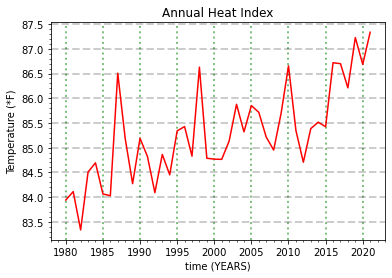

In [13]:

from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
# Data for plotting

#HIm=np.mean(HI)
fig, ax = plt.subplots()
ax.plot(year, HI, color='red')

ax.set(xlabel='time (YEARS)', ylabel='Temperature (*F)',
       title='Annual Heat Index')
#ax.grid()
ax.grid(axis="x", color="green", alpha=.5, linewidth=2, linestyle=":")
ax.grid(axis="y", color="black", alpha=.2, linewidth=2, linestyle="--")
ax.yaxis.set_minor_locator(AutoMinorLocator())
#ax.axhline(y = HIm, color ='r', label = 'Mean On-Set', linestyle = '--', lw =3)
minor_locator = AutoMinorLocator(5)
ax.xaxis.set_minor_locator(minor_locator)
ax.set_xticks(range(1980, 2021,5))
plt.minorticks_on()
fig.savefig("Heat-Indexqq.png")
plt.show()

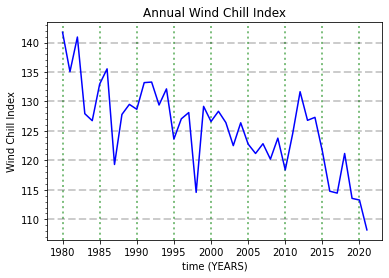

In [14]:
# Data for plotting


fig, ax = plt.subplots()
ax.plot(year, Tw, color='blue')



ax.set(xlabel='time (YEARS)', ylabel='Wind Chill Index',
       title='Annual Wind Chill Index')
ax.grid(axis="x", color="green", alpha=.5, linewidth=2, linestyle=":")
ax.grid(axis="y", color="black", alpha=.2, linewidth=2, linestyle="--")
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_xticks(range(1980, 2021,5))
fig.savefig("Wind-Chill-Indexqq.png")
plt.show()

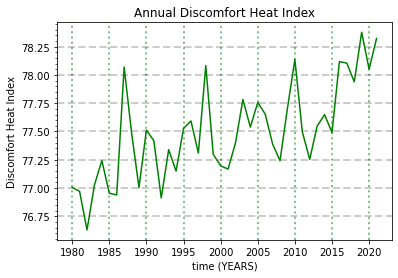

In [15]:
# Data for plotting


fig, ax = plt.subplots()
ax.plot(year, DI, color='green')

ax.set(xlabel='time (YEARS)', ylabel='Discomfort Heat Index',
       title='Annual Discomfort Heat Index')
ax.grid(axis="x", color="green", alpha=.5, linewidth=2, linestyle=":")
ax.grid(axis="y", color="black", alpha=.2, linewidth=2, linestyle="--")
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_xticks(range(1980, 2021,5))
fig.savefig("Discomfort-Heat-Indexqq.png")
plt.show()

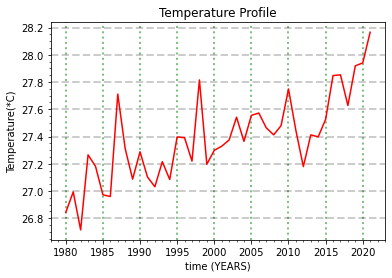

In [16]:

from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
# Data for plotting

#HIm=np.mean(HI)
fig, ax = plt.subplots()
ax.plot(year, TS, color='red')

ax.set(xlabel='time (YEARS)', ylabel='Temperature(*C)',
       title='Temperature Profile')
#ax.grid()
ax.grid(axis="x", color="green", alpha=.5, linewidth=2, linestyle=":")
ax.grid(axis="y", color="black", alpha=.2, linewidth=2, linestyle="--")
ax.yaxis.set_minor_locator(AutoMinorLocator())
#ax.axhline(y = HIm, color ='r', label = 'Mean On-Set', linestyle = '--', lw =3)
minor_locator = AutoMinorLocator(5)
ax.xaxis.set_minor_locator(minor_locator)
ax.set_xticks(range(1980, 2021,5))
plt.minorticks_on()
fig.savefig("Annual-Temperature.png")
plt.show()

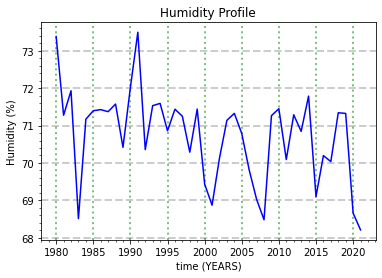

In [17]:

from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
# Data for plotting

#HIm=np.mean(HI)
fig, ax = plt.subplots()
ax.plot(year, RS, color='blue')

ax.set(xlabel='time (YEARS)', ylabel='Humidity (%)',
       title='Humidity Profile')
#ax.grid()
ax.grid(axis="x", color="green", alpha=.5, linewidth=2, linestyle=":")
ax.grid(axis="y", color="black", alpha=.2, linewidth=2, linestyle="--")
ax.yaxis.set_minor_locator(AutoMinorLocator())
#ax.axhline(y = HIm, color ='r', label = 'Mean On-Set', linestyle = '--', lw =3)
minor_locator = AutoMinorLocator(5)
ax.xaxis.set_minor_locator(minor_locator)
ax.set_xticks(range(1980, 2021,5))
plt.minorticks_on()
fig.savefig("Annual-Humidity.png")
plt.show()

In [18]:
ds = xr.open_dataset('CHIRPS_mon.nc')
ds = ds.to_dataframe()
ds.to_csv('chirps.csv')

In [19]:
df2=pd.read_csv(r'chirps.csv',usecols=['time','precip'],parse_dates=['time'])
df2 = df2.set_index('time')
df2= df2.resample('1Y').mean()
df2 = pd.DataFrame(df2)
#df2.dropna(0, inplace=True)
df2.to_csv('chirps.csv')

In [20]:
df2=pd.read_csv(r'chirps.csv',usecols=['time','precip'],parse_dates=['time'])
#df2 = df2.set_index('time')
df2['year'] = pd.DatetimeIndex(df2['time']).year
year = df2['year']
#years = df2.loc[:,'time']
precip = df2.loc[:,'precip']


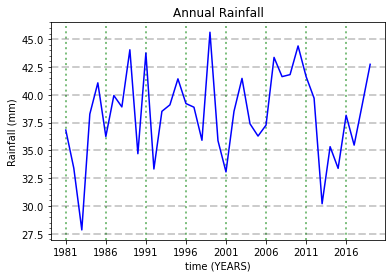

In [21]:
ds = xr.open_dataset('CHIRPS_mon.nc')
ds = ds.to_dataframe()
ds.to_csv('chirps.csv')

df2=pd.read_csv(r'chirps.csv',usecols=['time','precip'],parse_dates=['time'])
df2 = df2.set_index('time')
df2= df2.resample('1Y').mean()
df2 = pd.DataFrame(df2)
df2.to_csv('chirps.csv')


df2=pd.read_csv(r'chirps.csv',usecols=['time','precip'],parse_dates=['time'])
df2 = df2.set_index('time')
df2= df2.resample('1Y').mean()
df2 = pd.DataFrame(df2)
df2.to_csv('chirps.csv')


fig, ax = plt.subplots()
ax.plot(year, precip, color='blue')

ax.set(xlabel='time (YEARS)', ylabel='Rainfall (mm)',
       title='Annual Rainfall')
#ax.grid()
ax.grid(axis="x", color="green", alpha=.5, linewidth=2, linestyle=":")
ax.grid(axis="y", color="black", alpha=.2, linewidth=2, linestyle="--")
ax.yaxis.set_minor_locator(AutoMinorLocator())
#ax.axhline(y = HIm, color ='r', label = 'Mean On-Set', linestyle = '--', lw =3)
#minor_locator = AutoMinorLocator(5)
#ax.xaxis.set_minor_locator(minor_locator)
ax.set_xticks(range(1981, 2019,5))

fig.savefig("Annual-Rainfall.png")
plt.show()

In [22]:
# ##
# #Python's program to calculate the Wind Chill Index (WCI)
# #The wind chill index is only considered valid for temperatures less than or
# #equal to 10 degrees Celsius and wind speeds exceeding 4.8 kilometers per hour.
# ##

# #Define the constants
# WINDCHILL_OFFSET = 13.12
# WINDCHILL_FACTOR1 = 0.6215
# WINDCHILL_FACTOR2 = -11.37
# WINDCHILL_FACTOR3 = 0.3965
# WINDCHILL_EXP = 0.16


# #Read the inputs from user air temperature and wind speed
# temp= float(input("Enter the air temperature in (degrees Celsius): "))
# speed= float(input("Enter the wind speed (kilometer per hour): "))

# #Calculate the WCI
# wci = WINDCHILL_OFFSET + (WINDCHILL_FACTOR1 * temp) + (WINDCHILL_FACTOR2 * speed ** WINDCHILL_EXP) + (WINDCHILL_FACTOR3 * temp * speed ** WINDCHILL_EXP)

# #Display the result
# print("Your Wind Chill Index ","%d"%(wci))